In [1]:
import time
import matplotlib.pyplot as plt
from deque import Deque_Array_Seq
import numpy as np

dq = Deque_Array_Seq()
print(dq.A)
print(dq.start)

[None, None, None]
1


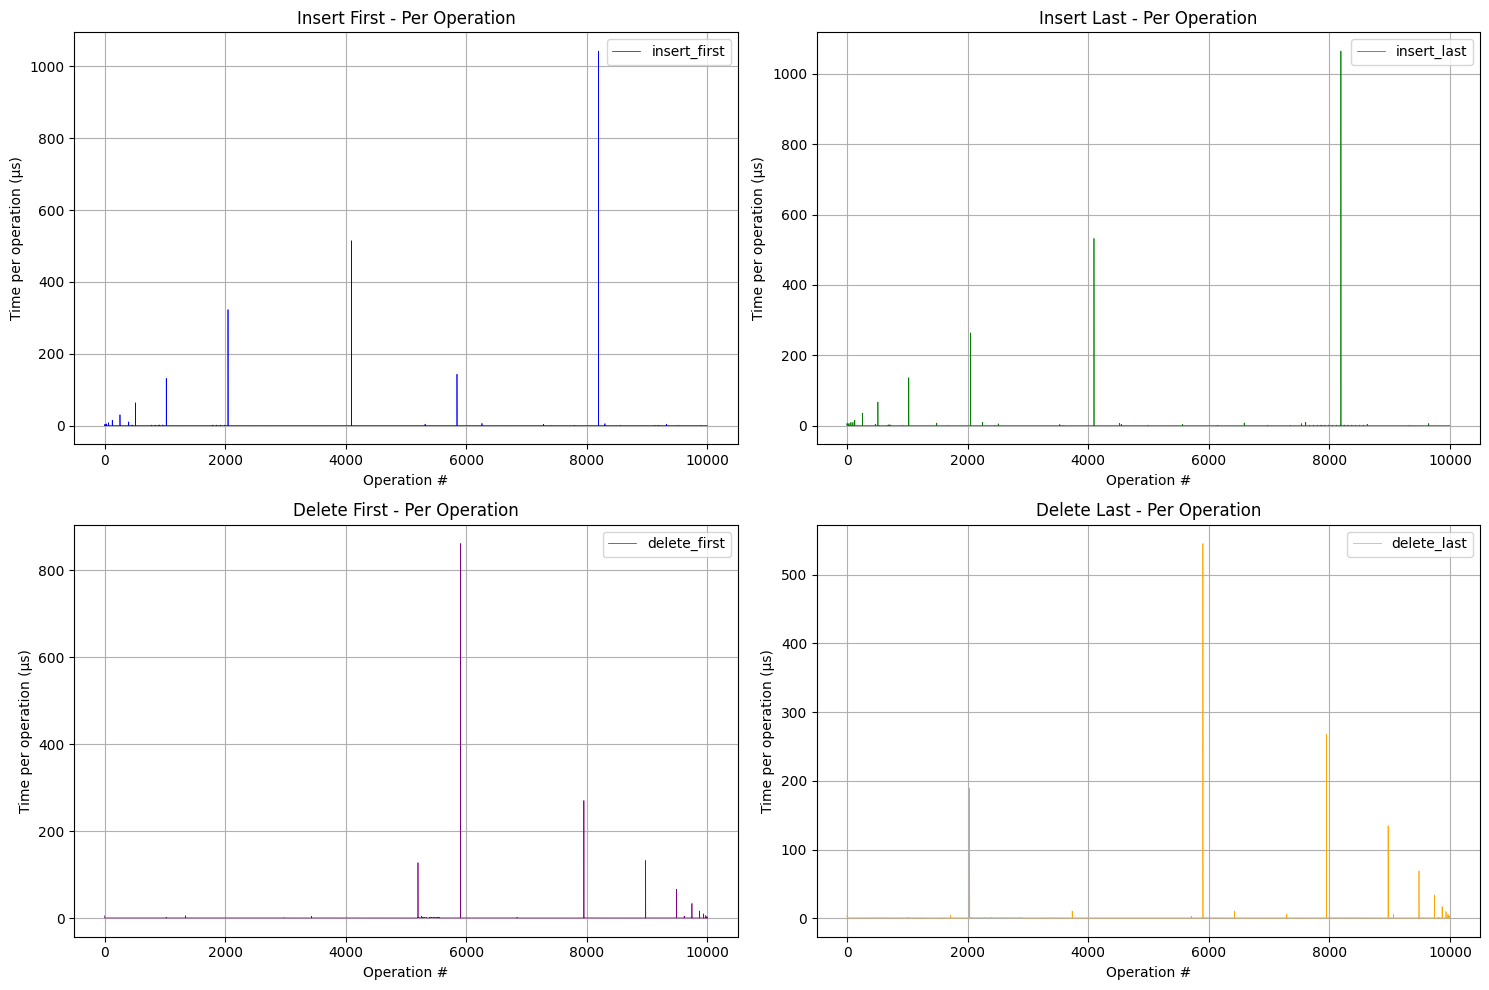

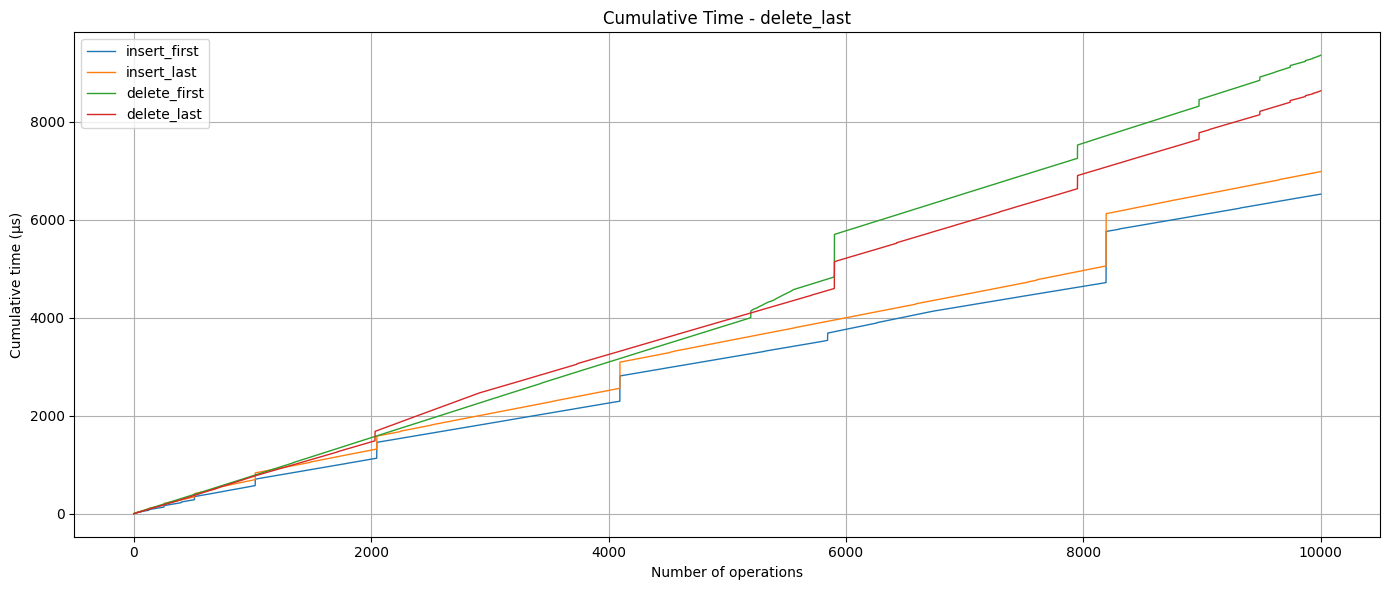

In [2]:
# ------------------------- Benchmark Functions ------------------------- #

def benchmark_insertions(n=10000):
    dq_first = Deque_Array_Seq()
    dq_last = Deque_Array_Seq()
    times_first, times_last = [], []

    for i in range(n):
        start = time.perf_counter()
        dq_first.insert_first(i)
        end = time.perf_counter()
        times_first.append((end - start) * 1e6)

    for i in range(n):
        start = time.perf_counter()
        dq_last.insert_last(i)
        end = time.perf_counter()
        times_last.append((end - start) * 1e6)

    return times_first, times_last, dq_first, dq_last

def benchmark_deletions(dq_first, dq_last, n):
    times_first, times_last = [], []

    for _ in range(n):
        start = time.perf_counter()
        dq_first.delete_first()
        end = time.perf_counter()
        times_first.append((end - start) * 1e6)

    for _ in range(n):
        start = time.perf_counter()
        dq_last.delete_last()
        end = time.perf_counter()
        times_last.append((end - start) * 1e6)

    return times_first, times_last

# ------------------------- Plotting Functions ------------------------- #

def plot_per_operation(title, times, label, color):
    plt.plot(times, label=label, color=color, linewidth=0.5)
    plt.xlabel("Operation #")
    plt.ylabel("Time per operation (µs)")
    plt.title(title)
    plt.legend()
    plt.grid(True)

def plot_all_operations(insert_f, insert_l, delete_f, delete_l):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plot_per_operation("Insert First - Per Operation", insert_f, "insert_first", "blue")

    plt.subplot(2, 2, 2)
    plot_per_operation("Insert Last - Per Operation", insert_l, "insert_last", "green")

    plt.subplot(2, 2, 3)
    plot_per_operation("Delete First - Per Operation", delete_f, "delete_first", "purple")

    plt.subplot(2, 2, 4)
    plot_per_operation("Delete Last - Per Operation", delete_l, "delete_last", "orange")

    plt.tight_layout()
    plt.show()

def plot_cumulative(times, label):
    cumulative_time = np.cumsum(times)
    plt.plot(cumulative_time, label=label, linewidth=1)
    plt.xlabel("Number of operations")
    plt.ylabel("Cumulative time (µs)")
    plt.title(f"Cumulative Time - {label}")
    plt.grid(True)
    plt.legend()

def plot_all_cumulative(insert_f, insert_l, delete_f, delete_l):
    plt.figure(figsize=(14, 6))

    plot_cumulative(insert_f, "insert_first")
    plot_cumulative(insert_l, "insert_last")
    plot_cumulative(delete_f, "delete_first")
    plot_cumulative(delete_l, "delete_last")

    plt.tight_layout()
    plt.show()

# ------------------------- Run All ------------------------- #

if __name__ == "__main__":
    N = 10000
    insert_first_times, insert_last_times, dq_f, dq_l = benchmark_insertions(N)
    delete_first_times, delete_last_times = benchmark_deletions(dq_f, dq_l, N)

    plot_all_operations(insert_first_times, insert_last_times, delete_first_times, delete_last_times)
    plot_all_cumulative(insert_first_times, insert_last_times, delete_first_times, delete_last_times)
